In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# Read the data..
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Data Understanding

In [ ]:
# Check the top values of training data set.
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# Check the lower values of training data set.
df_train.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [ ]:
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
df_train.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


# Data Cleaning
Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [ ]:
# summarising number of missing values in each column
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [ ]:
# percentage of missing values in each column
round(df_train.isnull().sum()/len(df_train.index), 2)*100

PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
Survived        0.0
dtype: float64

In [ ]:
#Check the missing Columns
missing_columns = df_train.columns[100*(df_train.isnull().sum()/len(df_train.index)) > 70]
print(missing_columns)

Index(['Cabin'], dtype='object')


In [ ]:
# Drop the column which has large missing value
df_train = df_train.drop(missing_columns, axis=1)
print(df_train.shape)

(891, 11)


In [ ]:
# summarise number of missing values again
100*(df_train.isnull().sum()/len(df_train.index))

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
Survived        0.000000
dtype: float64

In [ ]:
# fill the empty places with mean or maximum used value
df_train.Age = df_train.Age.fillna(df_train.Age.mean())
df_train.Embarked = df_train.Embarked.fillna('S')

In [ ]:
# summarise number of missing values again
100*(df_train.isnull().sum()/len(df_train.index))

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Survived       0.0
dtype: float64

In [ ]:
#now check the data again
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Now see there is no missing value in our data..so out data is cleaned

# Data Analysis and Outlier Handling
Let's now move to data analysis

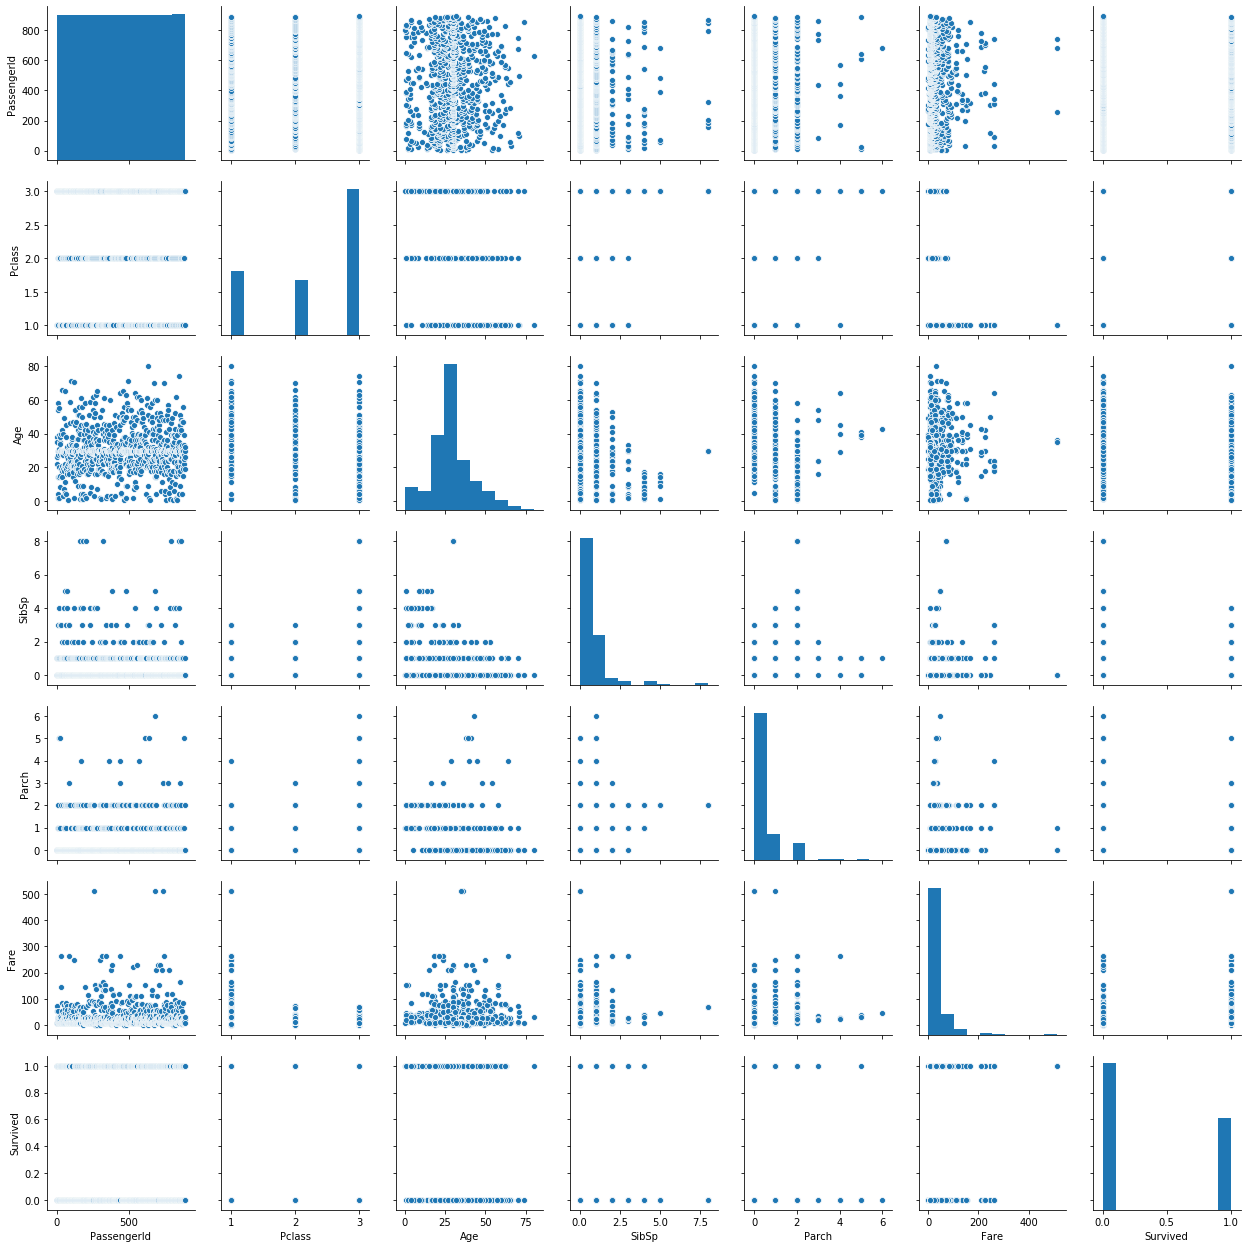

In [ ]:
sns.pairplot(df_train)
plt.show()

From the graph we see that there is lot of outtliers in the case of (fare,age)columns.

In [ ]:
#change outlier value with mean
# AGE
df_train.Age[(df_train.Age> 75)] = (df_train.Age.mean())
# FARE
df_train.Fare[(df_train.Fare> 500)] = (df_train.Fare.mean())

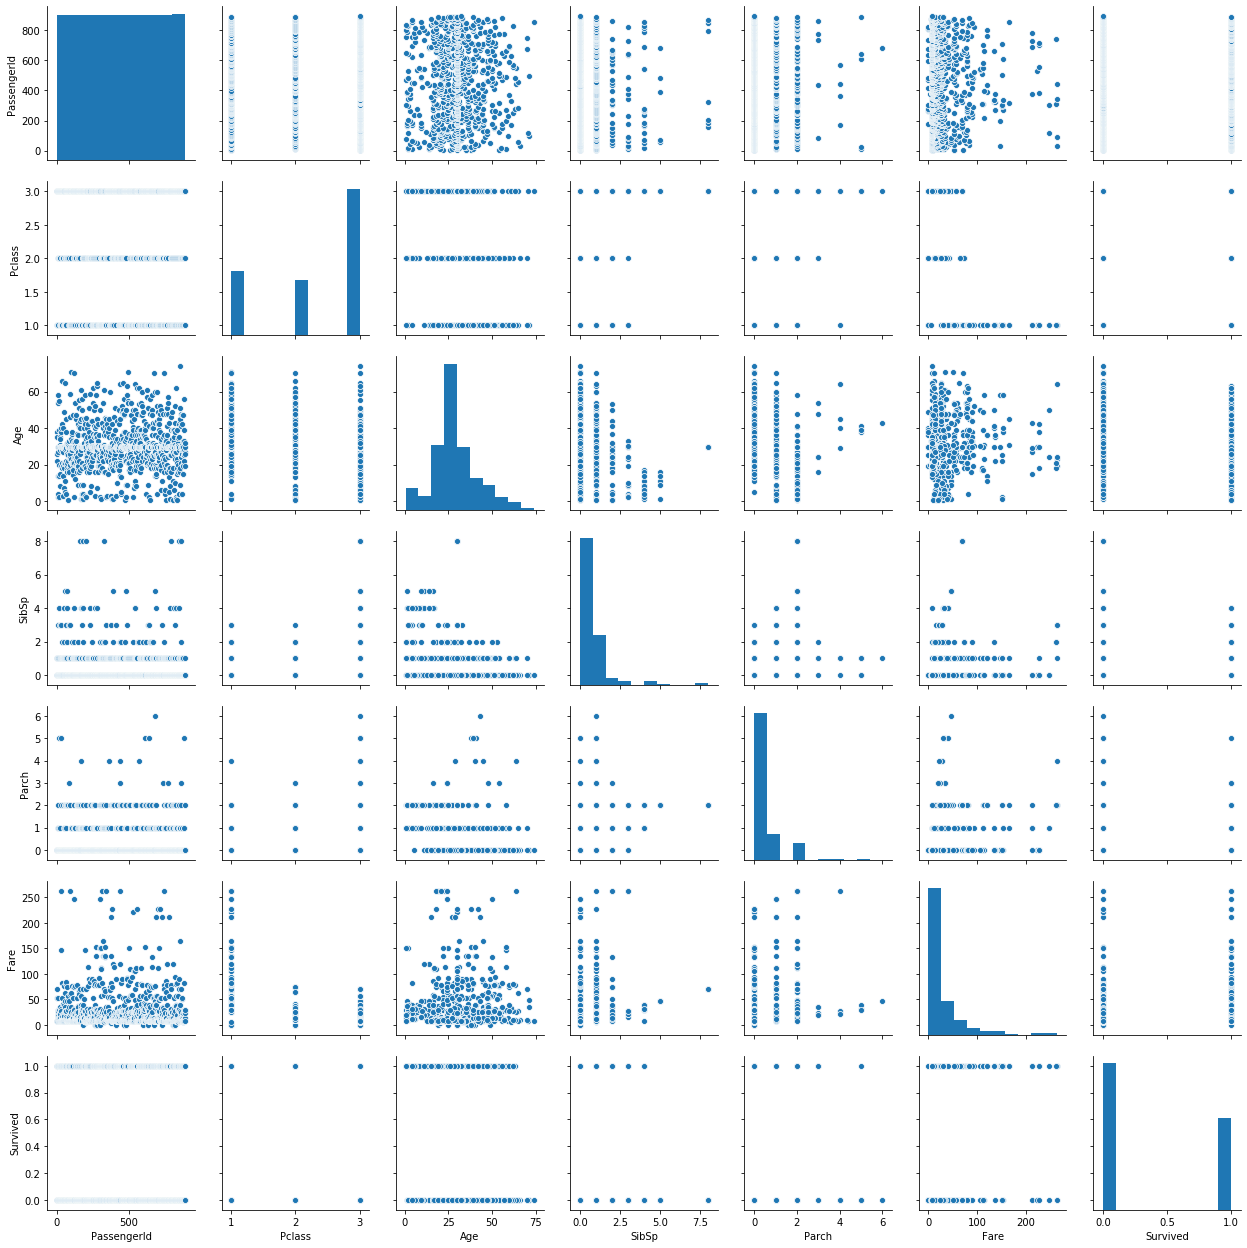

In [ ]:
#check the values again
sns.pairplot(df_train)
plt.show()

## Analyze by pivoting features
 **TO CHECK HOW MUCH A PART OF COLUMN AFFECT THE MODEL**

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
df_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


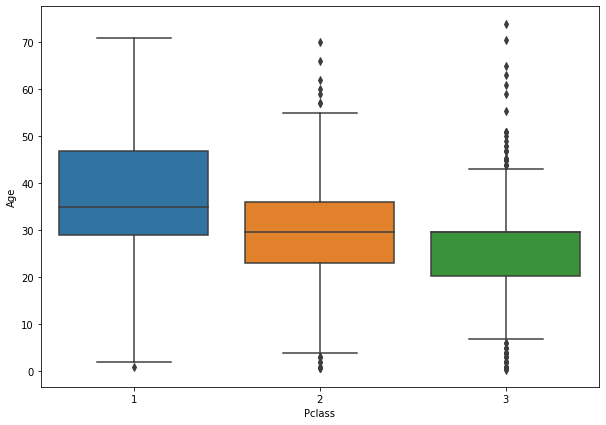

In [ ]:
# boxplot acc to age of passengers...
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df_train)

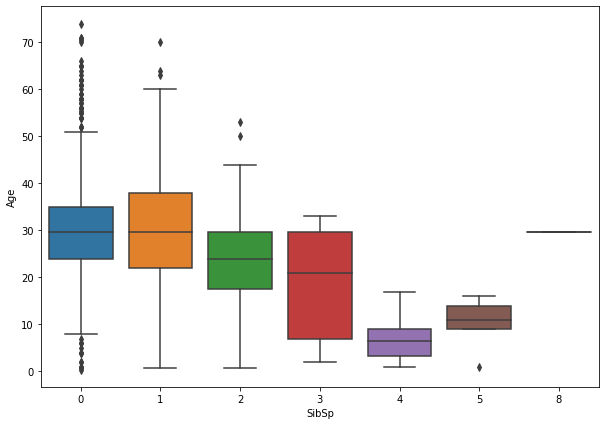

In [ ]:
# boxplot acc to SibSp of passengers...
plt.figure(figsize=(10,7))
sns.boxplot(x='SibSp', y='Age', data=df_train)

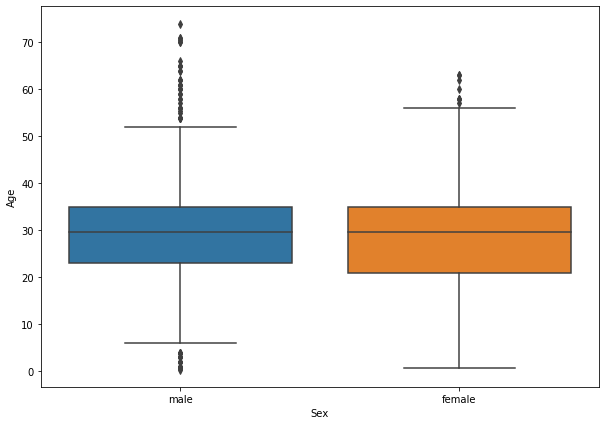

In [ ]:
# boxplot acc to Sex of passengers...
plt.figure(figsize=(10,7))
sns.boxplot(x='Sex', y='Age', data=df_train)

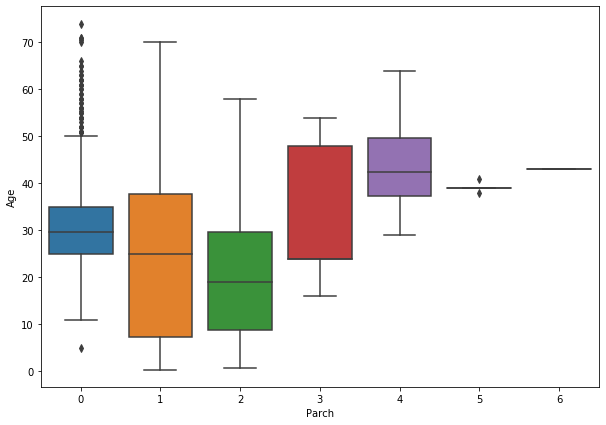

In [ ]:
# boxplot acc to Parch of passengers...
plt.figure(figsize=(10,7))
sns.boxplot(x='Parch', y='Age', data=df_train)

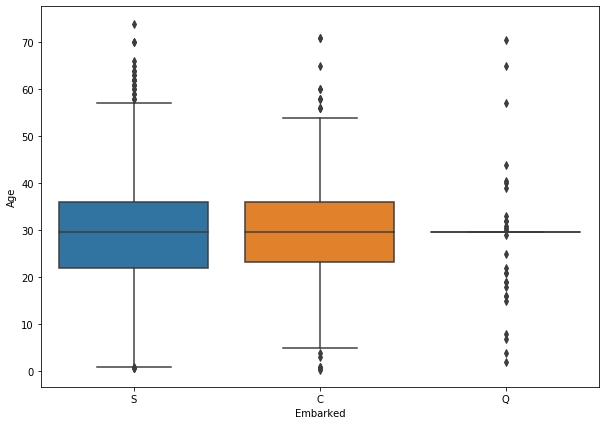

In [ ]:
# boxplot acc to Embarked of passengers...
plt.figure(figsize=(10,7))
sns.boxplot(x='Embarked', y='Age', data=df_train)

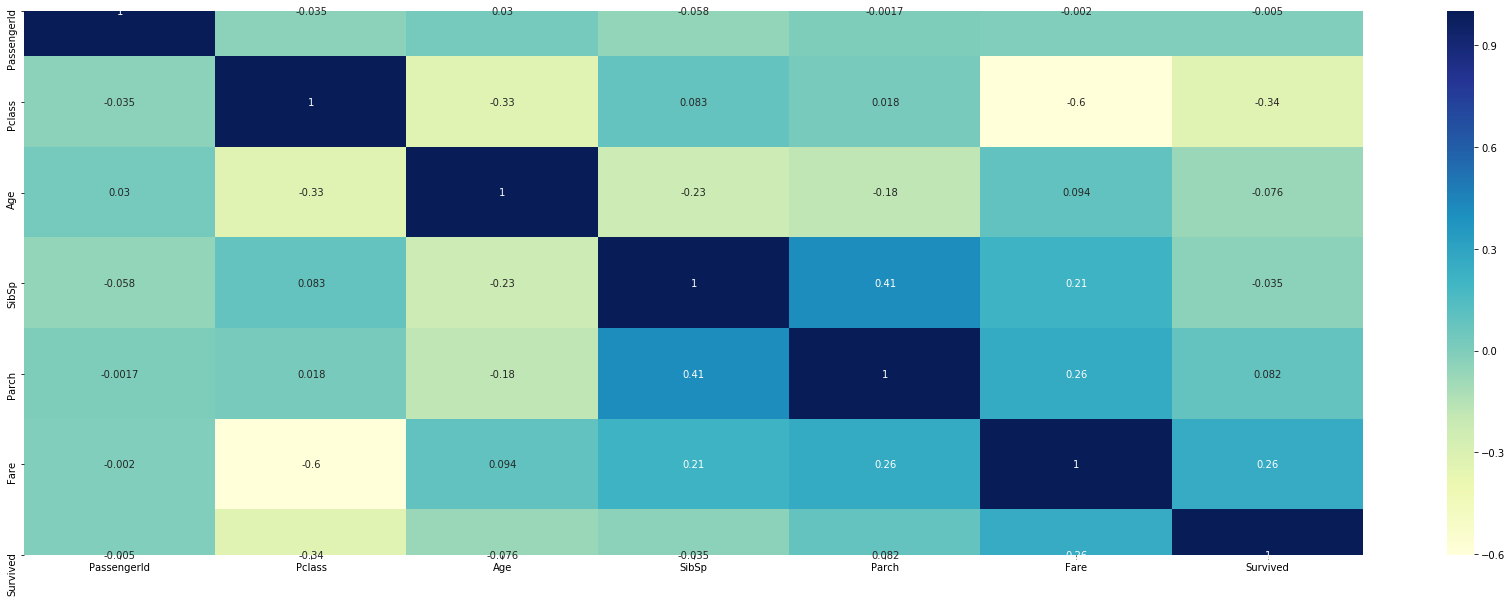

In [ ]:
#plot a heat map
plt.figure(figsize=(30,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
# Make the dummy variables for the feature 'Sex' and concat it with dataframe
# Let's drop the first column from status df using 'drop_first = True'
abc = pd.get_dummies(df_train['Sex'], drop_first = True)
df_train = pd.concat([df_train, abc], axis = 1)
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [ ]:
# Make the dummy variables for the feature 'Embarked' and concat it with dataframe
# Let's drop the first column from status df using 'drop_first = True'
abc = pd.get_dummies(df_train['Embarked'], drop_first = True)
df_train = pd.concat([df_train, abc], axis = 1)
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1


In [ ]:
# Make the dummy variables for the feature 'Pclass' and concat it with dataframe
# Let's drop the first column from status df using 'drop_first = True'
abc = pd.get_dummies(df_train['Pclass'], drop_first = True)
df_train = pd.concat([df_train, abc], axis = 1)
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S,2,3
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1,0,1


In [ ]:
#Dropping the redundant features which were converted to dummies earlier
df_train.drop(['Sex', 'Embarked','Pclass','Name', 'Ticket'], axis=1, inplace=True)

### Dividing into X and Y sets for the model building

In [ ]:
x_train = df_train.loc[:, df_train.columns != 'Survived']
y_train=  df_train['Survived']

# Building our model Using RFE

### Check RFE Value

In [ ]:
from sklearn.feature_selection import RFE
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)
rfe = RFE(clf_lr, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('PassengerId', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1),
 ('male', True, 1),
 ('Q', True, 1),
 ('S', True, 1),
 (2, True, 1),
 (3, True, 1)]

In [ ]:
col = x_train.columns[rfe.support_]
col

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
x_train_new = x_train[col]

In [ ]:
x_train_new = sm.add_constant(x_train_new)
lm = sm.GLM(y_train,x_train_new,family = sm.families.Binomial())
res=lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.10
Date:                Tue, 18 Aug 2020   Deviance:                       782.20
Time:                        21:23:32   Pearson chi2:                     913.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4046      0.526      8.368      0.000       3.373       5.436
PassengerId  8.276e-05      0.000      0.236      0.813      -0.001       0.001
Age            -0.0422      0.008     -5.289      0.000      -0.058      -0.027
SibSp          -0.3118      0.111     -2.805      0.005      -0.530      -0.094
Parch          -0.0726      0.121     -0.599      0.549      -0.310       0.165
Fare           -0.0004      0.003     -0.140      0.889      -0.007       0.006
male           -2.7388      0.202    -13.536      0.000      -3.135      -2.342
Q              -0.0495      0.382     -0.130      0.897      -0.799       0.700
S              -0.4836      0.238     -2.028      0.043      -0.951      -0.016
2              -1.0830      0.311     -3.484      0.000      -1.692      -0.474
3              -2.3515      0.319     -7.366      0.000      -2.977      -1.726
===============================================================================
"""

In [ ]:
y_train_pred = res.predict(x_train_new)
y_train_pred[:10]

0    0.082162
1    0.921013
2    0.614979
3    0.891644
4    0.065960
5    0.119973
6    0.245851
7    0.093578
8    0.569513
9    0.917272
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08216204, 0.92101288, 0.61497872, 0.89164368, 0.06595972,
       0.11997314, 0.24585131, 0.09357758, 0.56951279, 0.91727186])

### Creating the dataframe with actual value and predicted value

In [ ]:
y_train_final =  pd.DataFrame({'Survived':y_train.values,"Survived_prob":y_train_pred})
y_train_final["Id"]= x_train_new.PassengerId
y_train_final.head()

,Survived,Survived_prob,Id
0,0,0.082162,1
1,1,0.921013,2
2,1,0.614979,3
3,1,0.891644,4
4,0,0.065960,5


In [ ]:
# create new column as predict which tell about the predicted value is 1 if prob>0.5 else 0
y_train_final['PredictedValue'] = y_train_final.Survived_prob.map(lambda x:1 if x>0.5 else 0)
y_train_final.head()

,Survived,Survived_prob,Id,PredictedValue
0,0,0.082162,1,0
1,1,0.921013,2,1
2,1,0.614979,3,1
3,1,0.891644,4,1
4,0,0.065960,5,0


In [ ]:
# make a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_final.PredictedValue)

array([[475,  74],
       [100, 242]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_final.PredictedValue)

0.8047138047138047

# Checking VIF Values

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,5.04
7,S,4.96
9,3,4.21
0,PassengerId,3.62
5,male,3.08
4,Fare,2.30
8,2,2.07
3,Parch,1.67
2,SibSp,1.61
6,Q,1.59


Drop the columns which has VIF greater than 5

In [ ]:
x_train = x_train.drop('Age',axis =1)

In [ ]:
# check vif again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,S,4.56
8,3,4.15
0,PassengerId,3.39
4,male,2.86
7,2,2.01
3,Fare,1.94
2,Parch,1.66
1,SibSp,1.57
5,Q,1.51


In [ ]:
#fit the model again and check the accuracy again
x_train = sm.add_constant(x_train)
lm = sm.GLM(y_train,x_train,family = sm.families.Binomial())
res=lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.28
Date:                Tue, 18 Aug 2020   Deviance:                       812.56
Time:                        21:23:32   Pearson chi2:                     919.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7085      0.390      6.944      0.000       1.944       3.473
PassengerId  7.867e-05      0.000      0.229      0.819      -0.001       0.001
SibSp          -0.2168      0.102     -2.115      0.034      -0.418      -0.016
Parch          -0.0546      0.116     -0.468      0.640      -0.283       0.174
Fare            0.0009      0.003      0.279      0.780      -0.005       0.007
male           -2.7252      0.199    -13.710      0.000      -3.115      -2.336
Q              -0.2160      0.371     -0.582      0.561      -0.944       0.512
S              -0.5450      0.230     -2.367      0.018      -0.996      -0.094
2              -0.6557      0.293     -2.239      0.025      -1.230      -0.082
3              -1.7487      0.288     -6.062      0.000      -2.314      -1.183
===============================================================================
"""

In [ ]:
# make a confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train_final.Survived, y_train_final.PredictedValue)
confusion

array([[475,  74],
       [100, 242]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_final.PredictedValue)

0.8047138047138047

Now we see that there is not effect in accurracy score so age column do not effect our model.

# Performance metrics
* Precision
$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$
* Recall
$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$
* AUC (ROC) 

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
#Check Senstivity
TP / float(TP+FN)

0.7076023391812866

In [ ]:
# Check Specificity
TN / float(TN+FP)

0.8652094717668488

In [ ]:
# False Positive Rate
FN / float(TN+FP)

0.18214936247723132

## Plot Roc Curve

In [ ]:
def plt_roc(actual,probs):
    fpr,tpr,threshold = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC Curve(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.00,1.00])
    plt.ylim([0.00,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    
    return None

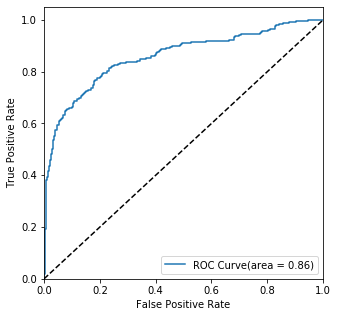

In [ ]:
fpr,tpr,threshold = metrics.roc_curve(y_train_final.Survived,y_train_final.Survived_prob,drop_intermediate=False)
plt_roc(y_train_final.Survived,y_train_final.Survived_prob)

# Find Optimal Cuttoff Point

In [ ]:
# lets check for all points
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i] = y_train_final.Survived_prob.map(lambda x:1 if x>i else 0)
y_train_final.head()

,Survived,Survived_prob,Id,PredictedValue,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.082162,1,0,1,0,0,0,0,0,0,0,0,0
1,1,0.921013,2,1,1,1,1,1,1,1,1,1,1,1
2,1,0.614979,3,1,1,1,1,1,1,1,1,0,0,0
3,1,0.891644,4,1,1,1,1,1,1,1,1,1,1,0
4,0,0.065960,5,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate accuracy,specificity and sensitivity for all d points...
df = pd.DataFrame(columns=['prob','Accuracy','Senstivity','Specificity'])
var = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in var:
    cm = confusion_matrix(y_train_final.Survived,y_train_final[i])
    total=sum(sum(cm))
    Accuracy = (cm[0,0]+cm[1,1])/total
    Specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    Senstivity = cm[1,1]/(cm[1,1]+cm[1,0])
    df.loc[i]  = [i,Accuracy,Senstivity,Specificity]
print(df)

     prob  Accuracy  Senstivity  Specificity
0.0   0.0  0.383838    1.000000     0.000000
0.1   0.1  0.560045    0.921053     0.335155
0.2   0.2  0.717172    0.853801     0.632058
0.3   0.3  0.772166    0.827485     0.737705
0.4   0.4  0.794613    0.769006     0.810565
0.5   0.5  0.804714    0.707602     0.865209
0.6   0.6  0.815937    0.654971     0.916211
0.7   0.7  0.792368    0.508772     0.969035
0.8   0.8  0.759820    0.388889     0.990893
0.9   0.9  0.692480    0.207602     0.994536


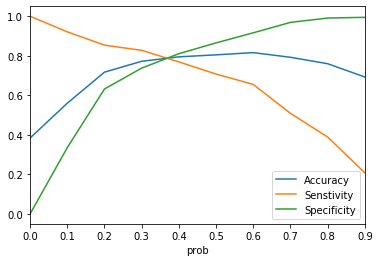

In [ ]:
df.plot.line(x='prob',y=['Accuracy','Senstivity','Specificity'])
plt.show()

**From the above graph we see that the cutoff point is approx 0.4**

In [ ]:
y_train_final['FinalPredictedValue'] = y_train_final.Survived_prob.map(lambda x:1 if x>0.4 else 0)
y_train_final.head()

,Survived,Survived_prob,Id,PredictedValue,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,FinalPredictedValue
0,0,0.082162,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.921013,2,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.614979,3,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.891644,4,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.065960,5,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
accuracy_score(y_train_final.Survived,y_train_final.FinalPredictedValue)

0.7946127946127947

In [ ]:
cnfsn = confusion_matrix(y_train_final.Survived, y_train_final.FinalPredictedValue)
cnfsn

array([[445, 104],
       [ 79, 263]], dtype=int64)

In [ ]:
TP = cnfsn[1,1]
TN = cnfsn[0,0]
FP = cnfsn[0,1]
FN = cnfsn[1,0]

In [ ]:
#Check Senstivity
TP / float(TP+FN)

0.7690058479532164

In [ ]:
# Check Specificity
TN / float(TN+FP)

0.8105646630236795

In [ ]:
# False Positive Rate
FN / float(TN+FP)

0.14389799635701275

# Precision and Recall

In [ ]:
cnfsn = confusion_matrix(y_train_final.Survived, y_train_final.FinalPredictedValue)
cnfsn

array([[445, 104],
       [ 79, 263]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score, recall_score
# Precision
print("Precision = ",precision_score(y_train_final.Survived, y_train_final.FinalPredictedValue))
# Recall
print("Recall = ",recall_score(y_train_final.Survived, y_train_final.FinalPredictedValue))

Precision =  0.7166212534059946
Recall =  0.7690058479532164


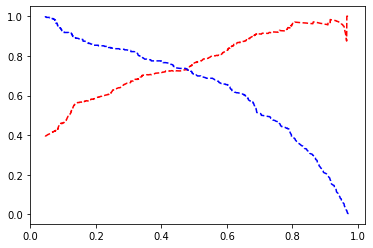

In [ ]:
# plot graph
from sklearn.metrics import precision_recall_curve
p,r,threshold = precision_recall_curve(y_train_final.Survived, y_train_final.Survived_prob)
plt.plot(threshold,p[:-1],"r--")## Red in Colour
plt.plot(threshold,r[:-1],"b--")## Blue in Colour
plt.show()

# Now make predictions on test data.

## We firstly make test data according to out model

In [ ]:
abc = pd.get_dummies(df_test['Sex'], drop_first = True)
df_test = pd.concat([df_test, abc], axis = 1)
abc1 = pd.get_dummies(df_test['Embarked'], drop_first = True)
df_test = pd.concat([df_test, abc1], axis = 1)
abc2 = pd.get_dummies(df_test['Pclass'], drop_first = True)
df_test = pd.concat([df_test, abc2], axis = 1)

In [ ]:
# drop the columns
x_test = df_test.drop(['Pclass','Name','Age','Sex','Cabin','Ticket','Embarked','Survived'],axis =1)

In [ ]:
y_test = df_test['Survived']

In [ ]:
x_test.head()

,PassengerId,SibSp,Parch,Fare,male,Q,S,2,3
0,892,0,0,7.8292,1,1,0,0,1
1,893,1,0,7.0000,0,0,1,0,1
2,894,0,0,9.6875,1,1,0,1,0
3,895,0,0,8.6625,1,0,1,0,1
4,896,1,1,12.2875,0,0,1,0,1


In [ ]:
x_test_sm = sm.add_constant(x_test)

**Now we will make predictions with the help of trained model**

In [ ]:
y_test_pred = res.predict(x_test_sm)
y_test_pred[:15]

0     0.129617
1     0.568170
2     0.307980
3     0.096880
4     0.555937
5     0.096937
6     0.694473
7     0.198984
8     0.738262
9     0.065869
10    0.096869
11    0.385108
12    0.889896
13    0.207469
14    0.888094
dtype: float64

In [ ]:
# make new dataframe
df_y = pd.DataFrame(y_test)
df_y['Id'] = x_test.PassengerId
df_y['Survived'] = df_test.Survived
df_y['Survived_Prob'] = y_test_pred
df_y.head()

,Survived,Id,Survived_Prob
0,0,892,0.129617
1,1,893,0.568170
2,0,894,0.307980
3,0,895,0.096880
4,1,896,0.555937


From the precision recall graph the optimal point = 0.5

In [ ]:
df_y['FinalPredicted'] = df_y.Survived_Prob.map(lambda x : 1 if x>0.5 else 0)
df_y.head()

,Survived,Id,Survived_Prob,FinalPredicted
0,0,892,0.129617,0
1,1,893,0.568170,1
2,0,894,0.307980,0
3,0,895,0.096880,0
4,1,896,0.555937,1


In [ ]:
accuracy_score(df_y.Survived,df_y.FinalPredicted)

0.9545454545454546

In [ ]:
# make a confusion matrix
from sklearn.metrics import confusion_matrix
confusion3 = confusion_matrix(df_y.Survived,df_y.FinalPredicted)
confusion3

array([[251,  15],
       [  4, 148]], dtype=int64)

In [ ]:
TP = confusion3[1,1]
TN = confusion3[0,0]
FP = confusion3[0,1]
FN = confusion3[1,0]

In [ ]:
#Check Senstivity
TP / float(TP+FN)

0.9736842105263158

In [ ]:
# Check Specificity
TN / float(TN+FP)

0.943609022556391

# Thank You...........